# Anomaly Detection Notes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data

import itertools

%matplotlib inline

# Anomaly Detection: Continuous Variable Probabilistic Methods for Identifying Outliers

In [2]:
url = "https://gist.githubusercontent.com/ryanorsinger/6218f5731f3df7cb4771ff3879fdeaa3/raw/88cb6bed276e2236c33df011bd753b6c73832c30/quartet.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df.sample(3)

,id,dataset,x,y
1,1,I,8.0,6.95
36,36,IV,8.0,8.84
38,38,IV,8.0,7.04


In [7]:
df.groupby('dataset').describe().T

dataset           I         II        III         IV
id count  11.000000  11.000000  11.000000  11.000000
   mean    5.000000  16.000000  27.000000  38.000000
   std     3.316625   3.316625   3.316625   3.316625
   min     0.000000  11.000000  22.000000  33.000000
   25%     2.500000  13.500000  24.500000  35.500000
   50%     5.000000  16.000000  27.000000  38.000000
   75%     7.500000  18.500000  29.500000  40.500000
   max    10.000000  21.000000  32.000000  43.000000
x  count  11.000000  11.000000  11.000000  11.000000
   mean    9.000000   9.000000   9.000000   9.000000
   std     3.316625   3.316625   3.316625   3.316625
   min     4.000000   4.000000   4.000000   8.000000
   25%     6.500000   6.500000   6.500000   8.000000
   50%     9.000000   9.000000   9.000000   8.000000
   75%    11.500000  11.500000  11.500000   8.000000
   max    14.000000  14.000000  14.000000  19.000000
y  count  11.000000  11.000000  11.000000  11.000000
   mean    7.500909   7.500909   7.500000   7.500909
   std     2.031568   2.031657   2.030424   2.030579
   min     4.260000   3.100000   5.390000   5.250000
   25%     6.315000   6.695000   6.250000   6.170000
   50%     7.580000   8.140000   7.110000   7.040000
   75%     8.570000   8.950000   7.980000   8.190000
   max    10.840000   9.260000  12.740000  12.500000

In [11]:
mycols = list(itertools.product(['x', 'y'], ['50%', 'mean', 'max', 'std']))

In [12]:
df.groupby('dataset').describe()[mycols]

x                          y                           
         50% mean   max       std   50%      mean    max       std
dataset                                                           
I        9.0  9.0  14.0  3.316625  7.58  7.500909  10.84  2.031568
II       9.0  9.0  14.0  3.316625  8.14  7.500909   9.26  2.031657
III      9.0  9.0  14.0  3.316625  7.11  7.500000  12.74  2.030424
IV       8.0  9.0  19.0  3.316625  7.04  7.500909  12.50  2.030579

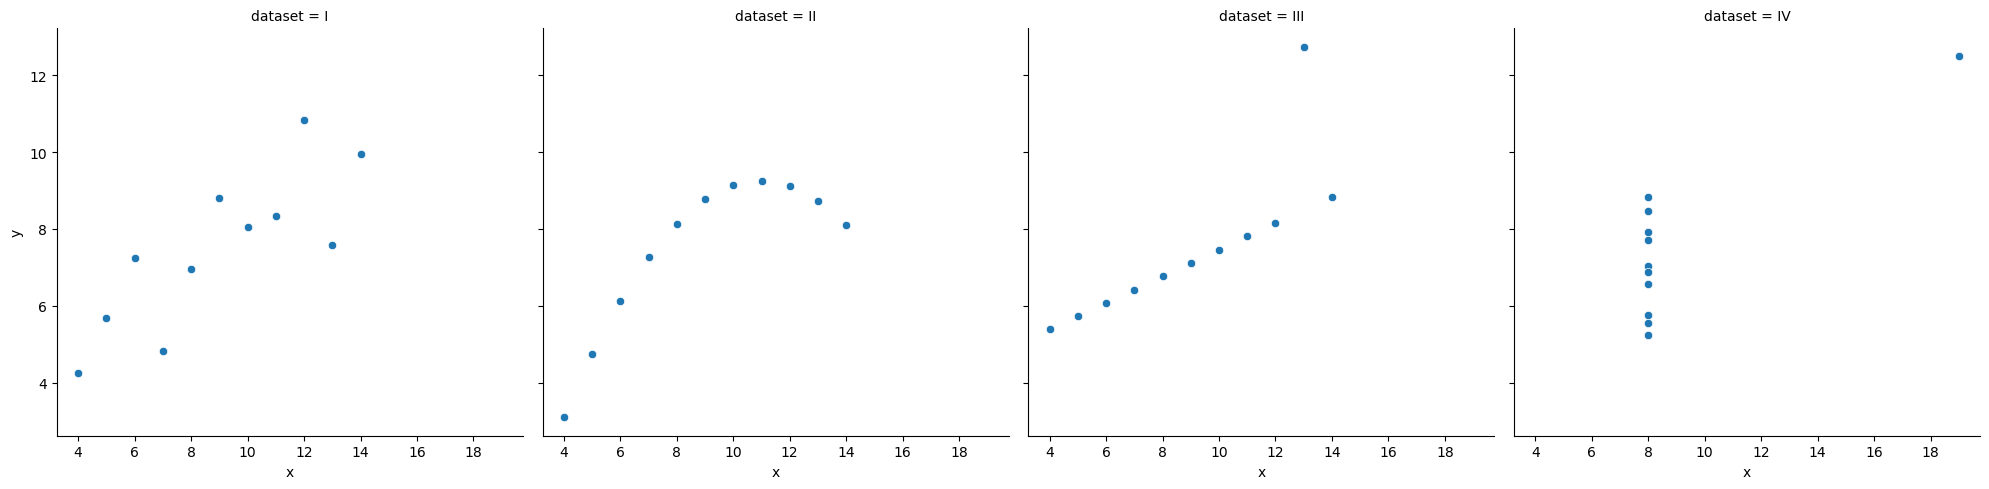

In [14]:
sns.relplot(x='x', y='y', col='dataset', data=df)